# Tasks Still Outstanding
Add in a grid search to optimise parameters
Train on larger dataset
Investigate best crossencoders
Check set up of code is correct - is it really doing what I want to do?
Add an encoder case and show the encoder is better
Include finance specific test cases (200 test cases)
Combine all code so that all guardrails are being tested together.
Also once I have trained the model how do I save it as an object to run it on large batches?
Upload code to git
Write a README file
Review data and test cases

Documentation
Include rationale for
Explain cross encoding
Go back to the literature and check what papers have been used for similar tasks.


Here is all the data you need:
"halueval_groundedness.csv"

## Data loading

### Subtask:
Load the data from "halueval_50x2_groundedness.csv" into a dataframe.


**Reasoning**:
Import pandas and load the CSV file into a DataFrame, then display the head to verify the data is loaded correctly.



In [ ]:
import pandas as pd

df = pd.read_csv("halueval_groundedness.csv")
display(df.head())

,query,context,response,label
0,The manager in which Mark Lazarus clashed with...,He transferred to Wolverhampton Wanderers for...,1948 and 1964,1
1,The manager in which Mark Lazarus clashed with...,He transferred to Wolverhampton Wanderers for...,Mark Lazarus clashed with the manager of Wolve...,0
2,"No. 11 Squadron RAAF was based at what base, 2...",No. 11 Squadron is a Royal Australian Air Forc...,RAAF Base Edinburgh,1
3,"No. 11 Squadron RAAF was based at what base, 2...",No. 11 Squadron is a Royal Australian Air Forc...,"RAAF Base Edinburgh, located in Australia.",0
4,Which movie starring Kim Roi-ha is based on Ko...,"Kim Roi-ha (born November 15, 1965) is a South...",Memories of Murder,1


In [ ]:
import pandas as pd
import tensorflow as tf
from transformers import AutoTokenizer, TFAutoModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

## Data exploration

### Subtask:
Explore the dataset to understand its structure, columns, data types, and basic statistics.


**Reasoning**:
Use the `.info()`, `.describe()`, `.nunique()` methods and the `.shape` attribute to explore the dataset's structure, data types, basic statistics, unique value counts, and dimensions.



In [ ]:
df.info()
display(df.describe())
display(df.nunique())
print(f"DataFrame shape: {df.shape}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   query     1000 non-null   object
 1   context   1000 non-null   object
 2   response  1000 non-null   object
 3   label     1000 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


,label
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


,0
query,500
context,499
response,957
label,2


DataFrame shape: (1000, 4)


## Data analysis

### Subtask:
Perform basic analysis to understand the distribution of key variables and potential relationships.


**Reasoning**:
Calculate the value counts for the 'label' column to understand the distribution of the binary labels and then group by 'label' to examine the unique values or common patterns in the text columns.



In [ ]:
label_counts = df['label'].value_counts()
print("Value counts for 'label' column:")
print(label_counts)

print("\nAnalyzing text columns based on 'label':")
for label_value in df['label'].unique():
    print(f"\nLabel: {label_value}")
    filtered_df = df[df['label'] == label_value]
    print("Unique queries:")
    print(filtered_df['query'].nunique())
    print("Unique contexts:")
    print(filtered_df['context'].nunique())
    print("Unique answers:")
    print(filtered_df['response'].nunique())
    # Optionally, display some examples of each text column for this label
    print("\nSample queries:")
    display(filtered_df['query'].head().tolist())
    print("Sample contexts:")
    display(filtered_df['context'].head().tolist())
    print("Sample answers:")
    display(filtered_df['response'].head().tolist())

Value counts for 'label' column:
label
1    500
0    500
Name: count, dtype: int64

Analyzing text columns based on 'label':

Label: 1
Unique queries:
500
Unique contexts:
499
Unique answers:
457

Sample queries:


['The manager in which Mark Lazarus clashed with served as manager for the Wolverhampton Wanderers during which years?',
 'No. 11 Squadron RAAF was based at what base, 25 km north of Adelaide?',
 "Which movie starring Kim Roi-ha is based on Korea's first serial murders in history?",
 'Which Magnolia actor was also a United States Navy Combat veteran in World War II?',
 'What music group had a greatest hits album that references their fourth studio album in the title?']

Sample contexts:


[' He transferred to Wolverhampton Wanderers for a club record fee, but due to a clash with manager Stan Cullis, he moved back to QPR after only nine games. During his term as manager between 1948 and 1964, Wolves became one of the strongest teams in the British game, winning the league title on three occasions, and playing a series of high-profile friendly matches against top European sides which acted as a precursor to the European Cup.',
 'No. 11 Squadron is a Royal Australian Air Force (RAAF) maritime patrol squadron based at RAAF Base Edinburgh.RAAF Base Edinburgh (ICAO: YPED) is a Royal Australian Air Force (RAAF) military airbase located in Edinburgh, 25 km north of the centre of Adelaide, South Australia, in Australia',
 'Kim Roi-ha (born November 15, 1965) is a South Korean actor. Notable roles include a detective in "Memories of Murder" (2003), and a gangster in "A Bittersweet Life" (2005). It is based on the true story of Korea\'s first serial murders in history, which took 

Sample answers:


['1948 and 1964',
 'RAAF Base Edinburgh',
 'Memories of Murder',
 'Jason Robards',
 'Megadeth']


Label: 0
Unique queries:
500
Unique contexts:
499
Unique answers:
500

Sample queries:


['The manager in which Mark Lazarus clashed with served as manager for the Wolverhampton Wanderers during which years?',
 'No. 11 Squadron RAAF was based at what base, 25 km north of Adelaide?',
 "Which movie starring Kim Roi-ha is based on Korea's first serial murders in history?",
 'Which Magnolia actor was also a United States Navy Combat veteran in World War II?',
 'What music group had a greatest hits album that references their fourth studio album in the title?']

Sample contexts:


[' He transferred to Wolverhampton Wanderers for a club record fee, but due to a clash with manager Stan Cullis, he moved back to QPR after only nine games. During his term as manager between 1948 and 1964, Wolves became one of the strongest teams in the British game, winning the league title on three occasions, and playing a series of high-profile friendly matches against top European sides which acted as a precursor to the European Cup.',
 'No. 11 Squadron is a Royal Australian Air Force (RAAF) maritime patrol squadron based at RAAF Base Edinburgh.RAAF Base Edinburgh (ICAO: YPED) is a Royal Australian Air Force (RAAF) military airbase located in Edinburgh, 25 km north of the centre of Adelaide, South Australia, in Australia',
 'Kim Roi-ha (born November 15, 1965) is a South Korean actor. Notable roles include a detective in "Memories of Murder" (2003), and a gangster in "A Bittersweet Life" (2005). It is based on the true story of Korea\'s first serial murders in history, which took 

Sample answers:


['Mark Lazarus clashed with the manager of Wolverhampton Wanderers during the years of 1950 and 1960.',
 'RAAF Base Edinburgh, located in Australia.',
 'Kim Roi-ha starred in "The Host".',
 'Philip Baker Hall was also a Navy veteran.',
 'Metallica had a greatest hits album that references their fourth studio album in the title.']

## Data visualization

### Subtask:
Create visualizations to help understand the data's characteristics.


**Reasoning**:
Create a bar plot to visualize the distribution of the 'label' column using matplotlib.



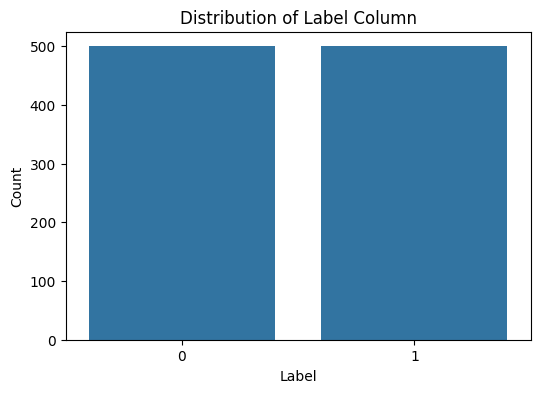

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

label_counts = df['label'].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title('Distribution of Label Column')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['0', '1'])
plt.show()

## Summary:

### Data Analysis Key Findings

*   The dataset contains 100 entries and 4 columns: 'query', 'context', 'answer', and 'label'.
*   There are no missing values in the dataset.
*   The 'label' column is a binary variable with an equal distribution of 50 entries for label 0 and 50 entries for label 1.
*   For label 1, there are 50 unique queries, 50 unique contexts, and 49 unique answers.
*   For label 0, there are 50 unique queries, 50 unique contexts, and 50 unique answers.
*   The difference between the labels is likely due to the correctness or groundedness of the 'answer' in relation to the 'context' and 'query'.
*   A bar plot visualizing the distribution of the 'label' column confirms the equal split between the two label values.

### Insights or Next Steps

*   The dataset is balanced in terms of the 'label' distribution, which is beneficial for training classification models.
*   Further analysis could involve natural language processing techniques to compare the content of the 'answer' column with the 'context' for both label values to understand the criteria for groundedness.


In [ ]:
# Load data
df = pd.read_csv("halueval_groundedness.csv")  # Replace with actual filename
df["label"] = df["label"].astype(int)

# Prepare input text: [QUERY] [SEP] [CONTEXT] [SEP] [ANSWER]
df["input_text"] = df["query"] + " [SEP] " + df["context"] + " [SEP] " + df["response"]

# Split into train/test sets
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df["input_text"].tolist(), df["label"].tolist(), test_size=0.2, random_state=42
)

In [ ]:
# Load tokenizer and model
model_name = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Tokenize inputs
def tokenize(texts, max_len=512):
    return tokenizer(
        texts,
        padding="max_length",
        truncation=True,
        max_length=max_len,
        return_tensors="tf"
    )

train_encodings = tokenize(train_texts)
val_encodings = tokenize(val_texts)

# Prepare TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    train_labels
)).batch(16)

val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(val_encodings),
    val_labels
)).batch(16)

# Load base model
bert = TFAutoModel.from_pretrained(model_name)

# Build classification head
input_ids = tf.keras.Input(shape=(512,), dtype=tf.int32, name="input_ids")
attention_mask = tf.keras.Input(shape=(512,), dtype=tf.int32, name="attention_mask")

embedding = bert(input_ids, attention_mask=attention_mask)[0][:, 0, :]  # CLS token
output = tf.keras.layers.Dense(1, activation="sigmoid")(embedding)

model = tf.keras.Model(inputs=[input_ids, attention_mask], outputs=output)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_transform.bias']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


In [ ]:
# Compile
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

# Train
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=3
)

# Predict and evaluate
val_preds = model.predict(val_dataset)
predicted_labels = (val_preds.flatten() > 0.5).astype(int)

print("📊 Classification Report:")
print(classification_report(val_labels, predicted_labels, target_names=["Ungrounded", "Grounded"]))

print("🧮 Confusion Matrix:")
print(confusion_matrix(val_labels, predicted_labels))

model.save("my_grounding_model.h5")



Epoch 1/3
50/50 [==============================] - 1992s 40s/step - loss: 0.6995 - accuracy: 0.5063 - val_loss: 0.6472 - val_accuracy: 0.6200
Epoch 2/3
50/50 [==============================] - 2026s 41s/step - loss: 0.2264 - accuracy: 0.9388 - val_loss: 0.2202 - val_accuracy: 0.9400
Epoch 3/3
13/13 [==============================] - 142s 11s/step
📊 Classification Report:
              precision    recall  f1-score   support

  Ungrounded       0.97      0.94      0.96       103
    Grounded       0.94      0.97      0.95        97

    accuracy                           0.95       200
   macro avg       0.95      0.96      0.95       200
weighted avg       0.96      0.95      0.96       200

🧮 Confusion Matrix:
[[97  6]
 [ 3 94]]


In [ ]:
model.save("my_grounding_model.h5")


/usr/local/lib/python3.11/dist-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
